In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [20]:
zoo=open('zoo.txt')

In [21]:
data=pd.read_csv('zoo.txt')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
data.keys()

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [41]:
#No inlcuir animal_name para cierto tipo de algortimo
X_train, X_test, y_train, y_test = train_test_split(data[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize']], data['type'],
                                                   random_state=3)
X=data[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize']];
y=data['type'];

In [24]:
#K-Neighbours:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.80000000000000004

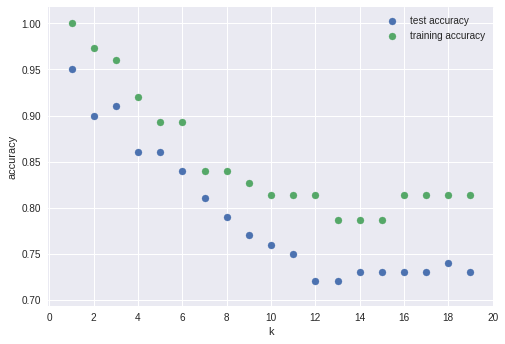

In [42]:
#Variación con K
from sklearn.model_selection import cross_val_score
k_range = range(1,20)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
scores = []
scores1=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    scores1.append(knn.score(X_train,y_train))
    scores.append(np.mean(cross_val_score(knn, X, y,cv=kfold)))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.scatter(k_range, scores1)
plt.legend(["test accuracy", 'training accuracy'])
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

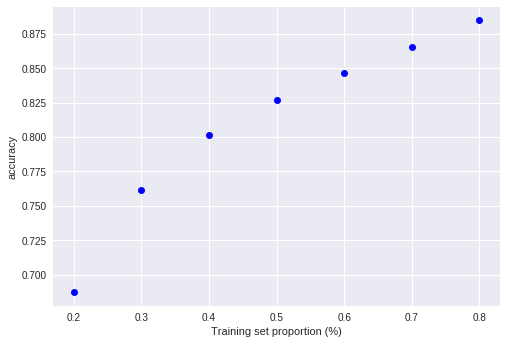

In [39]:
#variación con el random_state_parameter
t = [0.8,0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 4)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(data[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize']], data['type'],
                                                   test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
X=data[['hair', 'feathers', 'eggs', 'milk', 'airborne','aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize']];
y=data['type'];
scores = cross_val_score(knn, X, y)
print("Cross-validation scores: {}".format(scores))
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(scores)))

Cross-validation scores: [ 0.86486486  0.87878788  0.83333333]
Mean cross-validation score (3-fold): 0.859


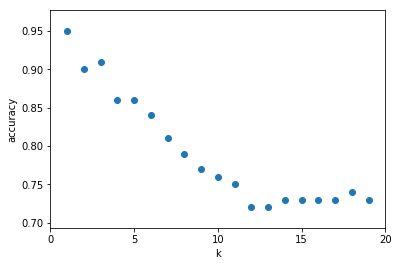

In [32]:
#Variación con K
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(np.mean(cross_val_score(knn, X, y,cv=kfold)))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize']], data['type'],
                                                   random_state=40)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.88


Feature importances: [ 0.          0.22556239  0.          0.37884596  0.          0.05220418
  0.          0.          0.07383162  0.          0.          0.15023202
  0.11932383  0.          0.          0.        ]


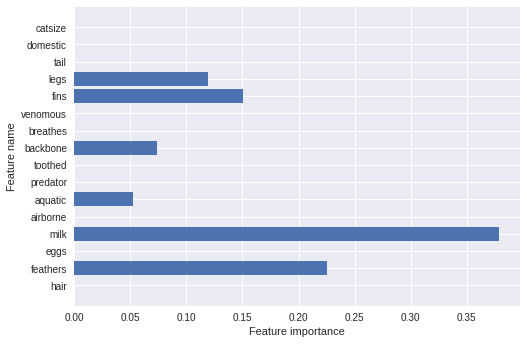

In [34]:
print('Feature importances: {}'.format(clf.feature_importances_))
feature=['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize'];
from adspy_shared_utilities import plot_feature_importances
plot_feature_importances(clf, feature)
plt.show()

In [35]:
#Limitando su profundidad
tree = DecisionTreeClassifier(max_depth=5,random_state=0)

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.973
Accuracy on test set: 0.880


In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=40)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.960


In [37]:
#Multiclass linear models
from sklearn.svm import LinearSVC

clf = LinearSVC(C=5, random_state = 40).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[  2.94479120e-01  -6.11534173e-03  -9.29861330e-01   7.94304217e-01
   -5.09395415e-04  -2.62994219e-02  -1.13915474e-02   1.50196443e-01
    1.44081101e-01   2.34984233e-01  -2.73566427e-01  -2.62994219e-02
   -7.89795769e-02  -1.15020707e-02  -4.12651747e-03   1.80731830e-02]
 [ -6.67711195e-03   1.53919793e+00  -3.31030042e-01  -2.83794342e-01
    2.15266158e-01   1.44546622e-02  -2.31739599e-03  -4.53302310e-01
    2.78059552e-01  -3.54152093e-02  -1.08385957e-01  -3.38239241e-01
   -1.66302630e-01   2.78059552e-01   3.15834641e-03   1.71179352e-01]
 [ -8.11399009e-01  -1.60929177e+00   3.48231917e-01  -8.11399009e-01
   -1.33741053e-01  -1.69148808e+00  -1.46683606e-01   2.41010692e-01
    1.19366251e+00  -1.63392009e-01   5.11873674e-02  -3.60248024e-01
   -6.30419513e-03   5.16906589e-01  -9.83305268e-02   1.35204498e-02]
 [  2.08166817e-17  -5.26085900e-02   1.54360163e-01  -7.38076690e-01
   -5.26085900e-02   9.71672937e-02  -5.31107937e-01   4.17307005e-01
  

In [38]:
clf.score(X_test,y_test)

0.95999999999999996